* Importing Liberaries  

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import warnings as w
w.filterwarnings("ignore")

* Loading dataset

In [4]:
path = "G:\\Data Field\\D..S..Course\\data.sc.Asem\\Data\Data\\2.9 Ensemble Reg\\data.csv"
data = pd.read_csv(path)
data

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


* Present data Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
year              348 non-null int64
month             348 non-null int64
day               348 non-null int64
week              348 non-null object
temp_2            348 non-null int64
temp_1            348 non-null int64
average           348 non-null float64
actual            348 non-null int64
forecast_noaa     348 non-null int64
forecast_acc      348 non-null int64
forecast_under    348 non-null int64
friend            348 non-null int64
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


* Present the Description of data

In [6]:
data.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


* Present correlation columns

In [9]:
C_M =data.corr()
C_M

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.000412,0.047651,0.032664,0.120806,0.004529,0.131141,0.127436,0.119786,0.048145
day,NaN,-0.000412,1.000000,-0.046194,-0.000691,-0.021136,-0.021675,-0.021393,-0.030605,-0.013727,0.024592
temp_2,NaN,0.047651,-0.046194,1.000000,0.857800,0.821560,0.805835,0.813134,0.817374,0.819576,0.583758
temp_1,NaN,0.032664,-0.000691,0.857800,1.000000,0.819328,0.877880,0.810672,0.815162,0.815943,0.541282
average,NaN,0.120806,-0.021136,0.821560,0.819328,1.000000,0.848365,0.990340,0.990705,0.994373,0.689278
actual,NaN,0.004529,-0.021675,0.805835,0.877880,0.848365,1.000000,0.838639,0.842135,0.838946,0.569145
forecast_noaa,NaN,0.131141,-0.021393,0.813134,0.810672,0.990340,0.838639,1.000000,0.979863,0.985670,0.669221
forecast_acc,NaN,0.127436,-0.030605,0.817374,0.815162,0.990705,0.842135,0.979863,1.000000,0.983910,0.696054
forecast_under,NaN,0.119786,-0.013727,0.819576,0.815943,0.994373,0.838946,0.985670,0.983910,1.000000,0.691177


* Get the 10 Strong feature with acual output

In [57]:
k = 5
S_C_M = C_M.nlargest( k , "actual")["actual"].index
S_C_M

Index(['actual', 'temp_1', 'average', 'forecast_acc', 'forecast_under'], dtype='object')

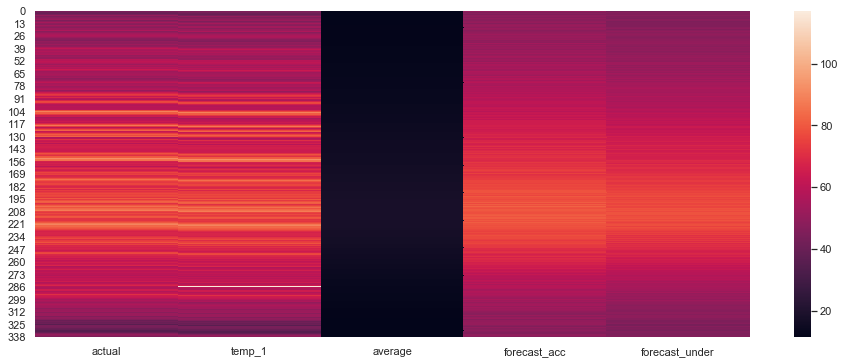

In [78]:
#sns.set(font_scale = 1)
f3 , ax3 = plt.subplots(figsize= (16,6))
fig3 = sns.heatmap(data[S_C_M]  )

* Get The probaplity oF Coreelation data

In [15]:
cols = np.corrcoef(data[S_C_M].values.T)
cols

array([[ 1.        ,  0.98345302,  0.20611772, ...,  0.75016633,
        -0.1623784 ,  0.03113959],
       [ 0.98345302,  1.        ,  0.35916215, ...,  0.66438314,
        -0.3314613 ,  0.14884963],
       [ 0.20611772,  0.35916215,  1.        , ..., -0.3558315 ,
        -0.97785386,  0.31671684],
       ...,
       [ 0.75016633,  0.66438314, -0.3558315 , ...,  1.        ,
         0.35222303,  0.15345297],
       [-0.1623784 , -0.3314613 , -0.97785386, ...,  0.35222303,
         1.        , -0.48062649],
       [ 0.03113959,  0.14884963,  0.31671684, ...,  0.15345297,
        -0.48062649,  1.        ]])

* Present Visualize Corelation

KeyError: "None of [Index([(0.9999999999999998, 0.9834530223027897, 0.20611772160664435, 0.5592767578967828, 0.30000070888720076, 0.22180850050357942, 0.3636145424825325, 0.290367070724788, 0.6063731995945645, -0.251144551703115, -0.020745870557735024, 0.7504854596669688, 0.2681446377470138, -0.21298221368008596, 0.8604016072639094, 0.46674557645265563, 0.30240943098772716, -0.3745039131303093, -0.05229219644454748, 0.5426742034131484, 0.34350084257124364, -0.3176372332840207, -0.22598881920832292, 0.40838663751126636, 0.09348161142180644, 0.12302770178606692, -0.14526023541639144, 0.014069000248619453, 0.21336295933823077, 0.4787240003575321, 0.8554859720856786, 0.3588957202659668, 0.17307865374738635, -0.43442335320936815, 0.8034125966362733, 0.022766096115423743, 0.6167116204318055, 0.6573082626653356, 0.035694730610483276, -0.13811340712993828, -0.2719354196411033, 0.08336915803563785, 0.004415935948136101, -0.05279605436427722, 0.17496545813397887, -0.1737078168803864, 0.4182687150853034, 0.24548337334655812, 0.8183052196023106, 0.6414100122954199, 0.49679619502146366, -0.0006469532496717446, -0.1254978349443029, -0.24888531678203854, -0.023563069406556735, -0.2832369297113495, 0.4100922468993975, 0.4241092011374146, 0.0003292008069719793, 0.08896733462220653, 0.12386876083239354, -0.19382728229226284, -0.23380281518328486, 0.3237910413636625, 0.8766942148136591, 0.6583232155337251, 0.2759895483026745, -0.041440092574652976, 0.8702766431058104, 0.7642036743879537, 0.6273943172691663, 0.8668916805302387, 0.1321658646666583, 0.6529715464310132, 0.008040752060914636, 0.1479081624984407, -0.04755202920840537, 0.5260545118155171, -0.06368858033209633, 0.6632786315776539, 0.4046498461559672, 0.25554232520480297, 0.16826190101946223, 0.41385566137054713, 0.49679047385014585, 0.2381733273136847, -0.27221193359154544, -0.19833499640863886, -0.18983082565091888, -0.28242432731315487, 0.037732104796924924, -0.0720921735180767, 0.22861818515453328, -0.041959691317743866, -0.0982751122318304, -0.20683245536553307, -0.12760933139806058, 0.058339458807227455, 0.8026571264270509, 0.3853682523348511, ...),\n                    (0.9834530223027897, 1.0, 0.3591621499815734, 0.6544756401842622, 0.30523587892785287, 0.07763605576163937, 0.4375208062416006, 0.13512194161456523, 0.4700664032143869, -0.3948236657951168, 0.08998184429034142, 0.6271337411286421, 0.09457195405312283, -0.2118881456261309, 0.8192054254668326, 0.300106692482663, 0.26834907989712237, -0.5295924988521565, -0.006180346582718442, 0.3962131795239555, 0.2347136411945647, -0.46872279808423006, -0.15626947874028668, 0.23708940814671664, -0.07282149382444476, -0.017915953278190996, -0.2661184342338439, -0.08569428214666375, 0.16849601206261963, 0.5298808680342869, 0.9115328251843319, 0.48805495340748734, 0.06600033772839305, -0.3543392267359049, 0.817432568694986, -0.15816608571153443, 0.6510002014363216, 0.5147674664088884, -0.14409544034198868, -0.2858142592243662, -0.3124277136231282, -0.011754804721195026, -0.1392764034901702, -0.11766662714273764, 0.04465730182193363, -0.29266012410030307, 0.38181909710899153, 0.2614922073500204, 0.7163406705811969, 0.6724398377735932, 0.4027529715567891, -0.1816750469952696, -0.2226375155803941, -0.36789690868333624, -0.12272231252444088, -0.33862629743839573, 0.42113729238834774, 0.26671404880142335, -0.043732383569713644, -0.07025620299524263, 0.04916792403347948, -0.35213058529453406, -0.29810843761062455, 0.36122490687426057, 0.7867191380912394, 0.5554577577983733, 0.13162748134871702, -0.11445269734661258, 0.9120454690884604, 0.6727423989669467, 0.7425600804370579, 0.8732544725814715, 0.1502800923151711, 0.506606169656371, -0.1585686831971291, 0.06105924665186333, -0.005620112391552493, 0.3805329920527942, -0.20839543979178118, 0.7519941754453243, 0.44379163097051794, 0.16344727874225423, 0.00444670544481042, 0.5402992199065311, 0.42431969115570434, 0.05996381135615972, -0.40763736677962076, -0.33418653938234544, -0.28379598407788215, -0.30485816949602706, -0.12201814352115915, -0.07314209868035156, 0.24363003465761393, -0.2220532459878487, -0.25010759672021005, -0.30767686707630393, -0.16107758464774452, 0.07266124348035205, 0.8030049314796653, 0.21677238142363262, ...),\n                         (0.20611772160664435, 0.3591621499815735, 1.0, 0.8732331091070871, 0.48991900600781135, -0.35323677561067535, 0.1655639898374622, -0.4910689388517452, -0.6431912292695856, -0.8983887501924904, 0.28210264155109416, -0.32229395693575064, -0.852387913566501, -0.4610839676207039, -0.1361037846043263, -0.7125980101459001, -0.4545766702706351, -0.913579209762563, -0.14815721425191028, -0.40695796864819744, -0.7411357264934526, -0.979919819216226, -0.03132288917512682, -0.6582508587613615, -0.8789071055125006, -0.8076853655748795, -0.8898921610783844, -0.7999333634817084, -0.5391713024492115, 0.07422564972462217, 0.6590283468047408, 0.9640894707902804, -0.10779508323645398, 0.07142181113634945, 0.515540091108775, -0.8430384460546209, 0.09850523847571281, -0.5656963125160562, -0.8784517989429527, -0.9689531756017401, -0.6469095422123471, -0.7334558608388154, -0.9492599039604059, -0.7033674954398218, -0.7777372903431147, -0.9244944369728438, -0.39861530201106293, -0.1088166059280195, -0.1766899911918168, 0.28954825133184436, -0.6410461057981767, -0.8494738862291801, -0.8380839153949706, -0.9419813514749801, -0.7549588639232961, -0.6564639295635201, -0.04876307585194359, -0.785349340913976, -0.5640361314620188, -0.9522126762490266, -0.6185580268923784, -0.9932998234815106, -0.7464114734566613, -0.031474373693757385, -0.2869675559004735, -0.22518321624206905, -0.7977433818769585, -0.7747261566936737, 0.3804140151153471, -0.019612584347381768, 0.8253846699285893, 0.47244863900804235, 0.5645514694059546, -0.5182027172775104, -0.9474712666059838, -0.7010260965065642, -0.15750301453409776, -0.479268776791501, -0.9733139841036074, 0.5033056910710453, 0.7037669670702862, 0.014956390915105377, -0.9015543219899568, 0.543610370453124, 0.10473907211253994, -0.8371326777981464, -0.957247999030471, -0.9508634908353356, -0.8385753819402757, -0.5371173293249494, -0.9402992370924913, -0.4166789324211257, -0.24962239147515608, -0.8606969980112439, -0.9766872516132208, -0.8568705343723224, -0.5759530244123612, -0.2979248914260616, 0.14134190068271685, -0.7956943266954621, ...),\n          (0.5592767578967828, 0.6544756401842621, 0.8732331091070871, 0.9999999999999999, 0.7558954449476425, 0.019566557189522254, 0.0024296246277556183, -0.05405479238836916, -0.29068803233781354, -0.8641378565087899, -0.06720958472152166, 0.1720393240810066, -0.5295923715082772, -0.7042697374628278, 0.11638622770216092, -0.3107687842829964, -0.4736040681297902, -0.84588171845848, -0.42957839455595653, -0.004611524941202533, -0.580470387491068, -0.9090577910512795, -0.4019571166271001, -0.24309142462881742, -0.6712881310782643, -0.6788936601691622, -0.884613422880312, -0.7939311967117577, -0.5702282810892917, -0.008815187030073252, 0.8611082233675043, 0.9649998731528464, 0.24093559495345374, -0.3710869623274163, 0.7455931669866613, -0.5321500014336225, 0.09031289860275991, -0.1193146301121574, -0.6126006651761748, -0.8758030356800053, -0.8406981545327524, -0.7260315851363407, -0.8176524507352781, -0.7856727508680207, -0.6595654772999314, -0.9127719522385845, -0.3746835824677337, -0.260287516306006, 0.22193559353586634, 0.30403793293724884, -0.4111582372037259, -0.5555685981594767, -0.8732051917786466, -0.9419233597533947, -0.7779572501400652, -0.8438923469691957, -0.1273720504390916, -0.45691578830421015, -0.6860219292939272, -0.7378055383982234, -0.647396739323309, -0.8652688437038139, -0.877976425716557, -0.17406971036877866, 0.10751457090615386, 0.07112983778731323, -0.5972350969814647, -0.7937540939110176, 0.5169022479019768, 0.45831290797531654, 0.8167317819659161, 0.8347228461363966, 0.7230362295623832, -0.052452953289877986, -0.7545674209688031, -0.6841264505391758, -0.4351149362435323, -0.13064285160270428, -0.8492376263743256, 0.47035233497493434, 0.8840340112870253, 0.30984672831294374, -0.6663999784692394, 0.36794961131390475, 0.531696416421357, -0.47859592635452186, -0.9350457072940057, -0.9110735350534696, -0.8993880255377065, -0.7801935028463051, -0.7631856114589269, -0.6259900587042568, -0.37745582133651084, -0.578573423748101, -0.8542286146025332, -0.9101538633506265, -0.7478606673837804, -0.49149365559735636, 0.2777060156215899, -0.4207686134107898, ...),\n                       (0.30000070888720076, 0.30523587892785287, 0.4899190060078113, 0.7558954449476425, 1.0, 0.5336891871073806, -0.6361661797479734, 0.48550484416536244, -0.2154336745161306, -0.5752939722372956, -0.6861036403489755, 0.38910403915048986, -0.19621423825013276, -0.9921707776637602, -0.21300089985297885, -0.009063190773780655, -0.8128957505184797, -0.3851957531148738, -0.914548591699624, 0.267905009778548, -0.6320626305127753, -0.5130405019395496, -0.8822603818173851, 0.1482174703432325, -0.37891242362661587, -0.5548295009379419, -0.7637949240942647, -0.822069052405242, -0.8528793328393561, -0.6109446431246578, 0.48660277706691396, 0.6718490763582091, 0.7587015210082998, -0.7735737130957594, 0.4900980294098033, 0.008927859733426479, -0.487070284141518, 0.08121436646782398, -0.16097585570741477, -0.6041977649521071, -0.9805547755929368, -0.8047241302840799, -0.6126220474273915, -0.9214751758217794, -0.6060668469658009, -0.7676134632832536, -0.7333070025770261, -0.752246166439849, 0.23341599493362167, -0.2142686336022321, -0.4900980294098031, -0.021395919660253396, -0.8551326402765939, -0.7529989219653677, -0.8090395123865649, -0.9443536280603749, -0.6305617980844668, -0.25974188899521233, -0.9293768664289495, -0.45726119801649406, -0.8221236841911209, -0.4815256968876724, -0.9420591058415655, -0.7353345805788427, 0.02064600347538333, 0.05584140947371521, -0.4890700518759923, -0.8459061860169812, -0.009686798216049532, 0.6564572540827437, 0.26654798609854796, 0.7285067873303167, 0.9454439107658725, 0.19730882773371036, -0.4247849454637698, -0.8095641314787866, -0.9142334477059784, 0.05716619504750295, -0.600262398879647, -0.17846624806353323, 0.9021251505384617, 0.6779076806833004, -0.40533583458053024, -0.3295099678089405, 0.8828430011649198, -0.0543854413898921, -0.6711170964803285, -0.6823842686566317, -0.8695443410069308, -0.9893614168937747, -0.4919026326019618, -0.9717093531180605, -0.847347221106993, -0.030340600277754228, -0.5679436945137525, -0.8478356934438426, -0.9746542988639966, -0.9234876996734552, -0.18079436952899286, -0.10453721196815627, ...),\n                                        (0.22180850050357942, 0.07763605576163937, -0.35323677561067535, 0.019566557189522254, 0.5336891871073806, 1.0, -0.660900580316973, 0.9375686882972657, 0.45568387824585377, 0.3733183459755396, -0.8157679097360481, 0.719488709831431, 0.6491031213334375, -0.5781602621292705, 0.054985780687788643, 0.7174042058661452, -0.31682212596297077, 0.5096242626754486, -0.6883138358610856, 0.8727981771989285, 0.09322983733661283, 0.37504738495304313, -0.748838036735123, 0.848815721359867, 0.5645970258482802, 0.37626195950311236, 0.12535971393779, -0.01400864555601253, -0.29336874154729337, -0.5633854109511666, 0.07221455244880097, -0.17483435254385893, 0.9483893560104446, -0.6841363360533493, 0.32525158196701875, 0.7985207738724148, -0.39008745721305765, 0.6217220347443699, 0.7280475354500465, 0.3104464845700017, -0.3727490617709984, 0.0025601941397137536, 0.2656639359202784, -0.23823940329104398, 0.29234203887019655, 0.07499508065896769, -0.24703216237190012, -0.3997440942783081, 0.6439453172021357, -0.12734749526362363, 0.048405587916762104, 0.7935573974732258, -0.05707685779855616, 0.07265476601925898, 0.03743268640414223, -0.23594398844576114, -0.3057732249585069, 0.5315731160690405, -0.2957550633438478, 0.4106406008369342, -0.07632250491505176, 0.40880478609614795, -0.25781900385225853, -0.5319943852968666, 0.3766340321122138, 0.610789591862164, 0.39751582742653274, -0.23192936427618455, -0.1516456909908379, 0.7716860470557112, -0.28862753675115177, 0.36574503731834457, 0.5182844202409636, 0.7229485105793244, 0.5046783697759917, -0.0535689963940591, -0.6597277329297164, 0.7654980477744515, 0.26367320678313827, -0.4425339656450865, 0.41279783387354313, 0.9143470521135111, 0.4994188170244188, -0.7252564842772248, 0.8025139233099485, 0.7309945454524671, 0.22504416435624447, 0.2206194391416525, -0.0769819634616015, -0.4240917031107688, 0.4343703039338481, -0.5345419605970513, -0.5496505385154276, 0.7794844136557866, 0.33764215685955107, -0.02598170069838867, -0.38948727159464624, -0.5712898455095908, -0.024026656153256214, 0.6510990901029188, ...),\n                                              (0.3636145424825325, 0.4375208062416006, 0.16556398983746218, 0.0024296246277556183, -0.6361661797479734, -0.660900580316973, 1.0, -0.6508565818012492, 0.2072299437157983, -0.03680922981626354, 0.9033032034381225, -0.18455308558986083, -0.12865154265897602, 0.6937694711348469, 0.6454124277805863, -0.13834170480510768, 0.7964535581224194, -0.32433698514809517, 0.8838624049515195, -0.2180041751976886, 0.4550777324771843, -0.19156564814321675, 0.8177508774133304, -0.31153984878312685, -0.04336940963247161, 0.20766758905740504, 0.2339252457206142, 0.44084808770122474, 0.7399428592992104, 0.9847607868223602, 0.34197603743278165, 0.03264800550275691, -0.7920358253586085, 0.6405212857682395, 0.22605405933800563, -0.487687608762629, 0.9429686990425852, -0.04324595058292698, -0.31467126708185167, 0.017130181266520064, 0.5394525827552158, 0.5007347880629258, 0.11889037723154576, 0.5672082705418364, 0.31064815180738725, 0.20094323280746063, 0.8085789553286051, 0.9008711781329451, 0.11113238676909833, 0.7719572240577117, 0.4447567671528242, -0.4714660512457015, 0.37471998152000463, 0.13159929463937503, 0.43214601919638534, 0.4888075184557118, 0.8970490305652996, 0.0688009715120912, 0.688069215059923, -0.004471673204121101, 0.6101995762420604, -0.1632931336958195, 0.4610330200924171, 0.9713218341660614, 0.31107862525180713, 0.18664689190235437, 0.228485436043124, 0.44822466677008493, 0.7304454205434686, -0.2918623281877634, 0.549339436552537, -0.025655693582069133, -0.6277209271235015, -0.14459394883044788, -0.0826763178388394, 0.5614977572281691, 0.8809724202610076, -0.03901529699522138, 0.05218325796203952, 0.8682921458086211, -0.3432884440862643, -0.5836690714391202, 0.014351484314091464, 0.9136192300495081, -0.6200206045032417, -0.2922490381492001, 0.02051638059116066, 0.07879324953569067, 0.3534371641757202, 0.6076250993093444, 0.011786168206955045, 0.7782498887166562, 0.911299847863393, -0.4919409225947997, -0.0044255466300975625, 0.30949501386019757, 0.6570526637561649, 0.869353453676265, 0.7403409672142088, -0.12931370617003868, ...),\n                                                (0.290367070724788, 0.1351219416145652, -0.49106893885174513, -0.05405479238836916, 0.4855048441653624, 0.9375686882972658, -0.6508565818012492, 1.0, 0.5852944757777162, 0.3636413268427507, -0.8849332025198542, 0.8356300727582305, 0.7460175068526722, -0.49938687898458106, 0.1429588793851808, 0.8186274074298592, -0.2166035481444657, 0.511503643687082, -0.6816807517638181, 0.8320317988989315, 0.2371562275287252, 0.44875000592961356, -0.7969083199195423, 0.9068048843364297, 0.5940483674083422, 0.38093906451892445, 0.18316998211631635, 0.06819862193791247, -0.18939277022847234, -0.5177805477538819, 0.005704177193971166, -0.2691575393038326, 0.8741225853505883, -0.8220420092667935, 0.18109191934993188, 0.8671175032006314, -0.37911298464325266, 0.7734858677894139, 0.768405154395909, 0.3976321696194045, -0.30486044239351034, 0.049073982943317614, 0.3904746114343339, -0.14522215635413482, 0.3110860369610975, 0.18457837176398936, -0.1645929478605865, -0.46445821942766724, 0.6240833398896753, -0.2615363384878019, 0.2665510273577644, 0.8472393269814292, 0.036008755772727524, 0.19152251786946345, 0.053149065870066126, -0.23474259246102075, -0.3729299121028564, 0.6505516693651803, -0.2585315073574946, 0.5492738571054037, -0.06156909405628137, 0.5111822853109796, -0.16647105045207586, -0.536884823911115, 0.49921022393008047, 0.5099380467533772, 0.44907670577262543, -0.04345017064516298, -0.16665797810133373, 0.8012718600953896, -0.4047319222824231, 0.38293339821493383, 0.3625690905983241, 0.8417449313970361, 0.5805189999543691, 0.017010478261971697, -0.6648902810521781, 0.7177070005460108, 0.402167638302176, -0.48843959059307357, 0.25292156839187396, 0.7407685713578879, 0.587347973166924, -0.7452275978417129, 0.8113453882611915, 0.8424303708867439, 0.29649206084684415, 0.2972110499334081, 0.009378786472433004, -0.4072809687277451, 0.517468556112321, -0.47901375687763753, -0.4720130185878888, 0.8377608122336901, 0.44136822154347594, 0.04879241012621079, -0.33089374188033854, -0.5222724034748213, -0.07218854634425655, 0.7838171613643418, ...),\n                                                                                   (0.6063731995945645, 0.470066403214387, -0.6431912292695855, -0.2906880323378136, -0.21543367451613063, 0.4556838782458538, 0.2072299437157983, 0.5852944757777163, 0.9999999999999998, 0.5808954737449622, -0.1735181290230559, 0.8131785659663363, 0.9041832520510898, 0.2518899058228043, 0.8054901780431478, 0.936759151922422, 0.6496917290922292, 0.4734522973974654, 0.1457598034670728, 0.7765084479867113, 0.8907367407132905, 0.5592342653368485, -0.07667579991738842, 0.8473168894983176, 0.819887115178351, 0.8075003915187492, 0.651423263163951, 0.7041750341493527, 0.6478354986414057, 0.3628389469788565, 0.14758412774929303, -0.516908160105735, 0.20038549376191583, -0.30943735751720775, 0.25021371543850535, 0.6890132812465594, 0.45930150234296535, 0.9478242629202429, 0.7516510503414849, 0.7000848196219642, 0.35956493684006424, 0.7177077572055118, 0.7885154068601768, 0.5731801424223721, 0.824453479545738, 0.6385334583781036, 0.6991989982071901, 0.37141433419207276, 0.808737813496931, 0.3528127708794095, 0.8974607644653824, 0.6826037134799373, 0.619394176315197, 0.5866850472363813, 0.6586211702846024, 0.3789733699076421, 0.4490833655410638, 0.9742861768221523, 0.5223276722234258, 0.8439506702853808, 0.6688346130687424, 0.6596781365280066, 0.46181381186585846, 0.34968517343949385, 0.9134581073096683, 0.7590402078937758, 0.903693409098132, 0.6019415551477336, 0.4087445643839812, 0.5852944757777163, -0.14323887375272037, 0.2630108383670873, -0.37302732835591773, 0.9079829748081607, 0.7931605084116607, 0.7359552788685214, 0.16151270616601412, 0.8408324321658495, 0.7465204330087524, 0.16065235662083585, -0.25878255392125654, 0.2082306807854243, 0.8814512141700279, -0.07567846289381477, 0.25287829406187917, 0.8511033033469609, 0.5906516228582457, 0.6452341056039619, 0.5703041382831953, 0.27910620028024896, 0.8141857657643827, 0.33792266766718726, 0.430515764029581, 0.6569013452729777, 0.7306782933617277, 0.5738517526811987, 0.42270048499372354, 0.3460299779743537, 0.5748420515674301, 0.9343649544570731, ...),\n                                                                                   (-0.251144551703115, -0.3948236657951168, -0.8983887501924904, -0.8641378565087899, -0.5752939722372956, 0.37331834597553964, -0.03680922981626354, 0.36364132684275075, 0.5808954737449621, 1.0, -0.0807897970354905, 0.18350569527104899, 0.7997900939938993, 0.5129139005044311, 0.14493602378282794, 0.6398554424065246, 0.499127352524812, 0.9553870808900642, 0.2926932220624747, 0.4768866358478448, 0.7062927761575999, 0.955469239922807, 0.22315097465318226, 0.609019255978335, 0.9295705086348618, 0.9227923784862614, 0.9449109995744583, 0.8470378064665538, 0.5781331304768735, 0.01640107311947238, -0.5798749779353716, -0.9350325285649201, 0.0959076932261407, 0.1978761118005453, -0.3370188878523438, 0.7680942682430519, 0.030203644224800683, 0.42727810065708793, 0.8717311992144346, 0.9600520320021638, 0.708527888735773, 0.830564139864289, 0.9060201254919183, 0.7447017254661491, 0.8876681170029767, 0.9094837114173917, 0.4637387345224672, 0.34919559828096114, 0.24845214784363895, -0.016371458648164503, 0.49750407254393536, 0.7971789417623893, 0.863109129045722, 0.9049678882546434, 0.8831588279330808, 0.7990988291335702, 0.28708634453442455, 0.7288857336997348, 0.6833312203059317, 0.8727550634351101, 0.7626430405021671, 0.9382401112892162, 0.7760514467812609, 0.19637864701832702, 0.21453772938759544, 0.41907803854821346, 0.8548454649848254, 0.6793928242194831, -0.27828953390961847, -0.054337209758111356, -0.6690116876923996, -0.5407210171749581, -0.5166573483782073, 0.4022919887543046, 0.9372722043507576, 0.7730515960523682, 0.31821982222485284, 0.5940280741424202, 0.9034672943428571, -0.3545342663075821, -0.6180992928083153, 0.12431128952471171, 0.8873317628983486, -0.4291297595457129, -0.2189096119507708, 0.737877931435548, 0.9668873740146781, 0.9629288852402684, 0.868496410200938, 0.664754126647472, 0.9348033402574163, 0.5091061645426164, 0.31884798483095095, 0.7999047729896566, 0.943877797804171, 0.8970245055393192, 0.6620841449018254, 0.40172497248464034, 0.031231236864114092, 0.6909009598127038, ...),\n       ...\n                          (0.1625682179410319, 0.23202398135613828, 0.11414747588519145, -0.13420510054042303, -0.7331490543929536, -0.6467948249703024, 0.9619989626145423, -0.7060882402807732, 0.11594349298587991, 0.10352537650197378, 0.9545152724299153, -0.34107098889801896, -0.1399748886919784, 0.7585095763163975, 0.5031142386972841, -0.19821512454655438, 0.7731548291244711, -0.18231267100974605, 0.9408010942845785, -0.2416037058296139, 0.41645683727807625, -0.08821602573800011, 0.9183400527179739, -0.3498896586126008, 0.018580143767724808, 0.2825295857943335, 0.32826674870723865, 0.49513220754793397, 0.7348804531583618, 0.9172993926521104, 0.19321398477132354, -0.06964141579231259, -0.7955809976860462, 0.8078770624372027, 0.1422152807063074, -0.46058439532388656, 0.8706117863964046, -0.17434677325317996, -0.26170358811288946, 0.09248635056209865, 0.6334708773347199, 0.5609059765839981, 0.15215813139333279, 0.6200504618411127, 0.37022676990689496, 0.2712386592769009, 0.7725473131347402, 0.9511118879933212, 0.021587166701924457, 0.7542597666542538, 0.32723321871257105, -0.43053657659496997, 0.44528452021802434, 0.20689131245573197, 0.5264761979988556, 0.623144594542771, 0.9168695492180079, 0.021420581829258788, 0.7558412661090407, 0.0028290347252015458, 0.6751226825460631, -0.09330666173394167, 0.5428234078643508, 0.9685270061503759, 0.14820453791094954, 0.17815555112619327, 0.25184962504494346, 0.44536876481470344, 0.5952533167587358, -0.4363830300894922, 0.4555043080058698, -0.2209441405400381, -0.6428434781769564, -0.26480694147543754, -0.029421978515795293, 0.5964852534201849, 0.9450965959822082, -0.04058503355617081, 0.08757310554030061, 0.775512827124204, -0.4009283244127316, -0.5454498660454146, 0.034948498010538405, 0.841079688256339, -0.7384618051939614, -0.31608797006122724, 0.1246155305533581, 0.17026136416393192, 0.43701121968999806, 0.7245211467241504, 0.05933221497668807, 0.8339449561928078, 0.8952110893975426, -0.44705471583654827, 0.054943568805857795, 0.4027217343595407, 0.7316951195352608, 0.8998428531491931, 0.6616153882231235, -0.1860553855538515, ...),\n                 (0.7545781057328615, 0.8594813088048299, 0.711812999864238, 0.7720970310572517, 0.20768869838929732, -0.3449165424940405, 0.6189918291686589, -0.35354701926061066, 0.02157525133631689, -0.6726874102779429, 0.44466088936438225, 0.14579403444224553, -0.3918282271235504, -0.11951029396116966, 0.584216318190538, -0.21369767021047406, 0.17717018801102657, -0.8363302502777274, 0.18872621002975787, -0.06332408434247927, -0.07660916821662975, -0.7819049071185346, 0.1349876080930613, -0.2813724139687885, -0.48362444944240446, -0.3487051486419124, -0.5041497786518813, -0.29533122005244167, 0.0652308227089337, 0.6260453252374131, 0.9067359727464475, 0.732564479711948, -0.27066420017621645, 0.007848456318613539, 0.7337832261198339, -0.6364115396720517, 0.6835267512500305, 0.013889908029885387, -0.6006147116817635, -0.6128333382220706, -0.31454665236825446, -0.21200929819927808, -0.4859240818405167, -0.22437652811696984, -0.2663963830809777, -0.5347038701182595, 0.2659655084804779, 0.34243528283595276, 0.32631770400959437, 0.708693977568194, 0.07600658779750473, -0.6505201010549597, -0.4054785192087668, -0.6026755007284045, -0.30934170474338163, -0.36247560787795946, 0.4565307747161678, -0.20219680932119244, -0.09073712823084477, -0.4843003273034809, -0.0959218490990016, -0.7114229537952198, -0.3749537741612041, 0.4681518245871242, 0.39882785443805263, 0.22133254132471827, -0.24731766782953607, -0.2738359094493447, 0.8952604301142076, 0.270849207848003, 0.9503886998508807, 0.7007427701622972, 0.14158924098987066, -0.004058522085090354, -0.5659432093651766, -0.13349999830302572, 0.181044984978313, -0.05567920962809335, -0.5521681228373404, 0.905176152739, 0.4529690273066523, -0.11554798548743056, -0.4238662506832713, 0.8303894324081619, 0.0966687670859507, -0.4487540110274105, -0.6747876459712325, -0.6136016519191974, -0.446382432849951, -0.2460807420672638, -0.5129397685547935, -0.0023720140786107555, 0.29557575543472125, -0.6829871075563926, -0.6004775605693697, -0.4839011457673443, -0.1645865641901634, 0.16106003886063913, 0.7136176492991758, -0.2906056261322944, ...),\n                         (0.49287632613709154, 0.5608443057520998, 0.8009964013814127, 0.9714265009611949, 0.8763434677035034, 0.22533206067157935, -0.2089014385551464, 0.12441615254400192, -0.2852208819427216, -0.7817405199281062, -0.2628896397494774, 0.24230360563019285, -0.44029085057385325, -0.8452566803119935, 0.008720953508049046, -0.2235237431624553, -0.6168406759807512, -0.7116042364757932, -0.6076348185495245, 0.1222229314511835, -0.6369189000287898, -0.8176508052169238, -0.5679173017441993, -0.11293735464527492, -0.5841988456724649, -0.64178305392511, -0.8772881501500873, -0.8386037073851476, -0.6995039992478935, -0.21412448599855605, 0.7941619216238194, 0.917796200697355, 0.45270401541594335, -0.4901910090845144, 0.7399279443767685, -0.3712613336908784, -0.08955115389458398, -0.07286624333627349, -0.47485216635629296, -0.8246045825950329, -0.9309963488220943, -0.774029599717594, -0.7948929071954993, -0.8733388601228137, -0.6490278125184485, -0.9140375807002324, -0.5136796260205261, -0.4060192566408433, 0.265011473772547, 0.19224370113847777, -0.491580954161466, -0.39375366302521453, -0.9113142287080163, -0.9339520653581345, -0.8047665424568008, -0.9008546766346519, -0.2684273594752007, -0.414845577254881, -0.7909106507028246, -0.6888156745746182, -0.7166140946426774, -0.7816289915247543, -0.9481372078258966, -0.357874074090165, 0.074095103050757, 0.12143440911541928, -0.573063012135975, -0.880863320836768, 0.3775567059611249, 0.5524533745990552, 0.6947581901149736, 0.8357457849721407, 0.8617692855665681, 0.021768876937248362, -0.6727441218159805, -0.7526770800118405, -0.6074809771211919, -0.03339814773556251, -0.8182782722585543, 0.28964341637184127, 0.9652698184661764, 0.5035534964084094, -0.6050035724295721, 0.1519756032338365, 0.6763562509052206, -0.3625589107836925, -0.8874952004683127, -0.8742690232188248, -0.934100490569744, -0.8787254033117652, -0.7028848540035832, -0.7738047990529024, -0.5606556111597505, -0.41509161240232845, -0.8011674053746067, -0.9308659795190549, -0.8589835720892723, -0.6606972604386343, 0.16631065863414768, -0.3424487844265758, ...),\n                 (0.8393759965785091, 0.8679530652438092, 0.5808980322891052, 0.8950932705677581, 0.7298068342960162, 0.2780198095012138, 0.020511663311806493, 0.2730822730372694, 0.1586508705548167, -0.6248324408056961, -0.22841884453445183, 0.5816488600933931, -0.11020791573538212, -0.660937828072049, 0.45194025071898886, 0.13307817888385362, -0.2431231697855173, -0.6318795241991101, -0.4472734296644464, 0.36885978907074757, -0.2108739021416192, -0.6611649987456696, -0.5219016030460205, 0.1712997118933619, -0.3095822752420922, -0.3454843218275148, -0.6282417166589478, -0.5237143428708142, -0.33937683859697293, 0.08570317920246177, 0.9282130156173655, 0.7494172927991278, 0.3984099220392844, -0.5925559411137298, 0.857676153219905, -0.1870331954546235, 0.23324880379824162, 0.3341715625689548, -0.2578432251956451, -0.5765216767094676, -0.7413289337365385, -0.45519515886733614, -0.4795801200498629, -0.5848899945757268, -0.324357616390619, -0.6558128605324516, -0.1202191618098395, -0.17520318499125911, 0.5947861485017313, 0.4050210374151965, -0.024128996637899944, -0.21702639648330802, -0.6390011734777971, -0.7037251400481604, -0.5340275009686023, -0.7380793399259062, -0.0012219933246950777, -0.01578227804154659, -0.5200831470417643, -0.35992992797234485, -0.4080426410452789, -0.568595858000203, -0.7240737575398934, -0.09564081725860336, 0.5226476696713312, 0.40148162937252063, -0.21325399466620604, -0.5612738995946492, 0.6665951316332237, 0.7729713711703465, 0.7260173131626638, 0.9915997546534319, 0.6115201802279995, 0.38987073123562943, -0.40077132907624957, -0.4057401057029381, -0.44661890174096963, 0.25313112547182753, -0.5252276023729409, 0.48928485475012456, 0.8086240254887981, 0.447433028424441, -0.2748541921228021, 0.272316454580054, 0.7188004303263685, -0.06758806697120041, -0.6905463945243848, -0.6444660576835568, -0.6879067218486504, -0.7262407921653875, -0.40672834217512527, -0.5487503718247014, -0.25636974738496165, -0.25075135685037975, -0.5366396241185776, -0.695071074580357, -0.625937579087864, -0.4133153033704545, 0.49156308769784846, 0.020196822483086387, ...),\n                  (0.6407873722936773, 0.7094093370422163, 0.7972838984169762, 0.9800925220094205, 0.7737445274331963, 0.17547067301558691, -0.014155778842760309, 0.07563638748380139, -0.15304415553349812, -0.7470479542770497, -0.12460412507899464, 0.30283671604116913, -0.38191203911397714, -0.729945825164361, 0.21105165607371568, -0.15556537233763237, -0.4299077300738801, -0.7396366939067838, -0.4550957124406821, 0.18362824267839134, -0.4875664004978954, -0.8227697663389237, -0.446655179772576, -0.0782247620281577, -0.5190903798849976, -0.5328889925665772, -0.7960057162281753, -0.7150898628711052, -0.5262749506518535, -0.0074043208793916505, 0.9082601726995612, 0.9051951825660166, 0.3586231869651375, -0.4164308020708504, 0.8511719975835697, -0.39722941632172415, 0.1290776924160802, 0.013873583341017614, -0.46343652611534153, -0.7773262604884488, -0.8325753889114923, -0.6323169824978137, -0.7216034562318812, -0.7450685862430324, -0.5213715336834196, -0.8466495160297828, -0.3132038908870552, -0.2093237032713887, 0.3922058387418319, 0.39233633280600255, -0.34535257279005505, -0.4169185937486578, -0.8133822833799776, -0.8867450299672117, -0.6803750966294494, -0.8014828388691319, -0.05797643909205586, -0.31412547311965633, -0.6385156427759714, -0.6285370111729076, -0.5558735432173375, -0.7713385886189467, -0.8545877462261979, -0.1553343775143712, 0.2283660580758559, 0.2590600623267576, -0.45121222238650194, -0.7802062013819582, 0.571766895520497, 0.5866930596716501, 0.8128202813916181, 0.8909785467412562, 0.7521636171504721, 0.09238263743259975, -0.6256485822258617, -0.5995496448097085, -0.4524188802774589, 0.06266204331059383, -0.7640947436777265, 0.4790073183463658, 0.9242227681048574, 0.45935880749006147, -0.5288439251499698, 0.3138957738600151, 0.6191402257282226, -0.33832854034960935, -0.8532893890530677, -0.8232117321245571, -0.8459458384708008, -0.770669612301209, -0.638225786582713, -0.6283015314513183, -0.3748427427125494, -0.44619136139269033, -0.754910766680362, -0.8488822199528816, -0.7285208796654956, -0.4931841940566932, 0.37755192061562, -0.2806084734846715, ...),\n                      (0.6316861008453771, 0.5676351960690862, 0.20382642164328027, 0.5947691814188675, 0.7825294839277642, 0.7928447129480235, -0.37399855174693303, 0.7003562051630731, 0.32558074242140606, -0.15517437972145628, -0.5909598576743409, 0.745007713606367, 0.2842908900482161, -0.7786128144199159, 0.28859416220893613, 0.4740042088559344, -0.36864263926992674, -0.08700826653755585, -0.6802101065859728, 0.7712260664321847, -0.12403592316231014, -0.2140686931522129, -0.7417503858867084, 0.5920340577341094, 0.13942382405507245, 0.017852744268447115, -0.33075149940987053, -0.3570787128875012, -0.4164330554094492, -0.2894508316703408, 0.6509481555743943, 0.39575581849615055, 0.8380647612344171, -0.7122939621713318, 0.7912196705041543, 0.3324690781319902, -0.07945870954520284, 0.5208401194953387, 0.2609683004750386, -0.20262812001847, -0.7017702060324095, -0.28877575949624507, -0.18362315025606285, -0.5332484320069475, -0.02396880864717045, -0.40047179155379625, -0.24274589551389758, -0.306901368968395, 0.7692107320273291, 0.2430956700319927, -0.06697331856629693, 0.31742859229278314, -0.4602204153364852, -0.4366616005116499, -0.30480955140027594, -0.5899367538833186, -0.14143054782706632, 0.26579589753441396, -0.5027993959382092, -0.02971863713840681, -0.2923865949972759, -0.14771532742794208, -0.6324400566748029, -0.36163317814016077, 0.5070531868817785, 0.6647353696284951, 0.09339483706106477, -0.5566590880673715, 0.3396134748450211, 0.9285348124056031, 0.33121683236787897, 0.8268198071755407, 0.7448133783356884, 0.628451119781171, 0.026735708437546944, -0.3011716005076891, -0.6575912606520041, 0.6409413198575189, -0.21997098695902778, 0.06870048083006947, 0.8095612727303686, 0.8927723028425942, 0.0981388229365315, -0.24703935158335777, 0.916019085507943, 0.3512018284876843, -0.3183742131690292, -0.2936164177624152, -0.5001450536729096, -0.7012299075765765, -0.020867623420954284, -0.6715734247110933, -0.506878020560092, 0.2857531832078153, -0.16873613760640988, -0.4696051481725715, -0.6345968004790372, -0.6058758651089298, 0.323152469528166, 0.35115293899232797, ...),\n                                                                               (0.7128895643553959, 0.6005878566984424, -0.5115567860484751, -0.1751566018987605, -0.22408043568828667, 0.34937029793390906, 0.35431670991776604, 0.47152782037281604, 0.982421129812758, 0.4689451627507103, -0.04276450572100799, 0.7911489791585877, 0.8109332272971577, 0.2746404323823107, 0.9019577329039592, 0.8657588528656476, 0.7064931805661188, 0.3223583269738518, 0.22858017887147883, 0.7285959745008888, 0.8805007719031619, 0.4204485017679079, 0.0026190172941507124, 0.7588451275248188, 0.7244633507961105, 0.7489219068181951, 0.5774929107934575, 0.6707693358239187, 0.6855088529179452, 0.5040023072670659, 0.2909444427266273, -0.3968577126890403, 0.10335785400248391, -0.25027395202454306, 0.36050928784729275, 0.545016614332972, 0.6029804586182188, 0.9127696776386562, 0.6232848758354923, 0.5939929957960288, 0.34189184883912377, 0.7001480066252519, 0.7030375097556084, 0.5622129906961771, 0.783376932667018, 0.5573958491405382, 0.7676662913116338, 0.4705712732674183, 0.8351208791745125, 0.4945787996802645, 0.9052286506761169, 0.5383845727439387, 0.5689293966708644, 0.49294051471968364, 0.6256798515830373, 0.352148512802011, 0.5609520438563241, 0.9177970357906827, 0.5408183970682454, 0.7479241170031069, 0.6769511882243842, 0.5285295087901353, 0.4266458614124696, 0.47012992220744354, 0.9571087581584814, 0.7799749657091575, 0.8561290524093526, 0.5728370996519586, 0.5683105259155793, 0.5819041828196362, 0.031069050390786886, 0.34707634628120493, -0.3825146767659568, 0.8654034345487387, 0.6836550179748835, 0.7321474376703025, 0.24285278893997853, 0.8046307586277224, 0.6484382627364459, 0.3399217542847082, -0.20976247989583555, 0.1488162379671239, 0.7948598702509944, 0.10367589414432642, 0.21402353611143352, 0.7400330074594634, 0.4802969831104777, 0.5453764374812704, 0.5145441082644153, 0.2792221983617188, 0.7176459230362566, 0.3802074599814947, 0.5189490692980936, 0.5075762042521397, 0.6233831420046341, 0.5100796719678785, 0.4317461035987843, 0.4166962201385189, 0.7059680474803992, 0.8529683796345836, ...),\n                                                                                    (0.7501663295335522, 0.6643831380310643, -0.35583150369911826, -0.08449664622913851, -0.2709405135152493, 0.2542011917348379, 0.5184124877660059, 0.3077263370116514, 0.9124783651163594, 0.4129118652213841, 0.1519639985891542, 0.6854405350510975, 0.6908299069141743, 0.31731957214193524, 0.9533133362980551, 0.7507040308149842, 0.7557567401297139, 0.21393767829666827, 0.35640359543666617, 0.689994220107856, 0.8365344461053636, 0.2934986446601967, 0.154013397885804, 0.6410023444256077, 0.6495348478790941, 0.7304621786369985, 0.5315725636690373, 0.6512201964127393, 0.7187006826433122, 0.642606314462027, 0.4191914076645997, -0.2858136820903267, 0.008159107939402468, -0.07641135185178144, 0.5000676515308364, 0.38231993869414455, 0.7537449531171188, 0.7968898762705089, 0.49988584375958245, 0.4943143973942879, 0.3541083544869913, 0.7119138431822826, 0.6021942090667843, 0.5631613598514678, 0.7761559189627579, 0.4784408478836361, 0.8311959690621825, 0.6391661992114477, 0.8526745919388075, 0.7018460502481175, 0.8290881978539569, 0.38523842610657744, 0.5310303257264622, 0.3972410385936005, 0.6404136159099924, 0.3887976614370433, 0.7339802188916558, 0.8223194292063655, 0.5971392657133591, 0.620569050391531, 0.7288661266285633, 0.39116150477308814, 0.40877173238921477, 0.6250351837816419, 0.9291063849991927, 0.8465362563003664, 0.8184928932249589, 0.5032534008933501, 0.7156853433561373, 0.5205384649588511, 0.22669159037801223, 0.36416432845656643, -0.3703545262359747, 0.7526807122451378, 0.5752296528901594, 0.7436631649182011, 0.3755008704121916, 0.7934787510132401, 0.5286950344210217, 0.531749056094347, -0.1416621457885555, 0.14346323602636932, 0.6987944665122445, 0.2920339078176741, 0.11819622645089688, 0.5876806597681238, 0.3895319505996188, 0.46177017583709273, 0.4765067101194043, 0.33425103617111573, 0.6210732447251281, 0.45066055558848345, 0.6100333051846464, 0.3481784250753414, 0.5116557911601378, 0.469684260361849, 0.4716953389445411, 0.5121967007783891, 0.8567110379693149, 0.7185858007034928, ...),\n                                                           (-0.16237840141133308, -0.3314613013226327, -0.9778538623111155, -0.7891581593173803, -0.3207014845118038, 0.5394212075133826, -0.31221336251658083, 0.645799496766592, 0.659286280875034, 0.8929695964619863, -0.4401962086287185, 0.4309815029651488, 0.9005815578244966, 0.28215669769492824, 0.10733194288960575, 0.7860922556568133, 0.32123569329241997, 0.9420857728755814, -0.026878978691516106, 0.54765606319978, 0.6702207225960447, 0.9682701035864382, -0.13962019530972541, 0.7700047748815655, 0.9096150697407084, 0.8014636457587027, 0.8247196770090459, 0.7074941515775847, 0.4046559145793246, -0.2117805351200679, -0.5957593792034201, -0.9089868229496214, 0.3107751991953325, -0.20977478393773183, -0.40809667747149725, 0.9345636872012113, -0.19747991097475806, 0.6275798751407774, 0.9490999346007676, 0.937958812546791, 0.4968735127979209, 0.6499574717058927, 0.9057673905986695, 0.5716330326700214, 0.7537669242885039, 0.844866986780603, 0.2840604451423925, -0.004279130363298824, 0.28128715649430097, -0.3075211364821459, 0.5664100437319918, 0.9397888735909918, 0.7357689553313194, 0.8622454124588838, 0.6803726123278586, 0.537251681208828, -0.040912291935918395, 0.8088995793342744, 0.4325296554829243, 0.9395600046873371, 0.5280953161472289, 0.9842886783702581, 0.6109567470943961, -0.10595214769699594, 0.3158955052402366, 0.32127875764909686, 0.7930227603318498, 0.6365899325961007, -0.40050900338886947, 0.17334708492617515, -0.8206806140703476, -0.36162758675365037, -0.385863783968178, 0.6089210446218525, 0.9594685610176026, 0.6061759901404282, -0.012122672261891464, 0.5874254423015864, 0.928862346287542, -0.5710996810077218, -0.5426282954940067, 0.19075623186944526, 0.9125059635268712, -0.6648237834497902, 0.07825991523553372, 0.907083877474714, 0.9117884305076707, 0.9028071228927409, 0.7335469490688131, 0.38745849252674325, 0.935840676189487, 0.2483548791098122, 0.08712418366300796, 0.9477944465453525, 0.9499943900451544, 0.7621503675890111, 0.4253875898583746, 0.13018480650529418, -0.15641284103860847, 0.8471785425801451, ...),\n                            (0.03113959429857009, 0.14884963378782282, 0.316716839509468, -0.015199067786480527, -0.6553546190158182, -0.8509207304154367, 0.9191199851725326, -0.8924344305766312, -0.17143947947548852, -0.15260396557048528, 0.9942900522091085, -0.553444569291489, -0.4333586370503148, 0.6887627967935254, 0.29423250305720533, -0.4880374567921631, 0.5936342652807663, -0.40085223534292624, 0.8895169159242077, -0.5358698340900727, 0.1631716049444808, -0.2986854053237579, 0.9146026126941393, -0.6319771235427429, -0.2879512591127277, -0.027595407569199308, 0.08879970133954809, 0.26050617888269945, 0.5510900687036833, 0.8387739058101128, 0.16487211357708287, 0.11488331334061748, -0.9082822957747744, 0.83418326711093, 0.027858143494145424, -0.7033634610173451, 0.745249359394763, -0.4277850635751565, -0.5417673062481652, -0.15256924734331082, 0.5094013209022871, 0.3079469145275088, -0.0976040470771165, 0.43965109719404494, 0.0652387249183927, 0.06136466952519479, 0.5725462265029928, 0.7944060895464047, -0.2519362252597989, 0.5967932396510806, 0.12071862180796329, -0.6800325162408805, 0.23950946466656942, 0.016520051404166847, 0.27287893385658396, 0.4555608847009523, 0.7397572149296145, -0.2755992184746102, 0.5718210476987202, -0.25685848990012794, 0.42916760507861057, -0.31990224015274016, 0.3920735511328135, 0.85775744702618, -0.08762579566123996, -0.12837618356254854, -0.061221835930640636, 0.30266188643003245, 0.4933526638818702, -0.6022118515273202, 0.5030706800713911, -0.2544600352222591, -0.5697314890247513, -0.5205186234805407, -0.30780755731168036, 0.3538789800086547, 0.8817254615807262, -0.36393726262341947, -0.14381807542718222, 0.7430387362340543, -0.35347588851818246, -0.704908288619334, -0.26004941408346005, 0.8988536196133291, -0.804183193384321, -0.5842701197119521, -0.09450564159807538, -0.06218136736051543, 0.2425471446125034, 0.6060483169998782, -0.2207596437987889, 0.7286996865199113, 0.7873429194930067, -0.6870643481459418, -0.1910846525865431, 0.19923674711614853, 0.589037888866332, 0.7982440008390943, 0.4712392975939733, -0.4644743335641438, ...)],\n      dtype='object', length=348)] are in the [columns]"

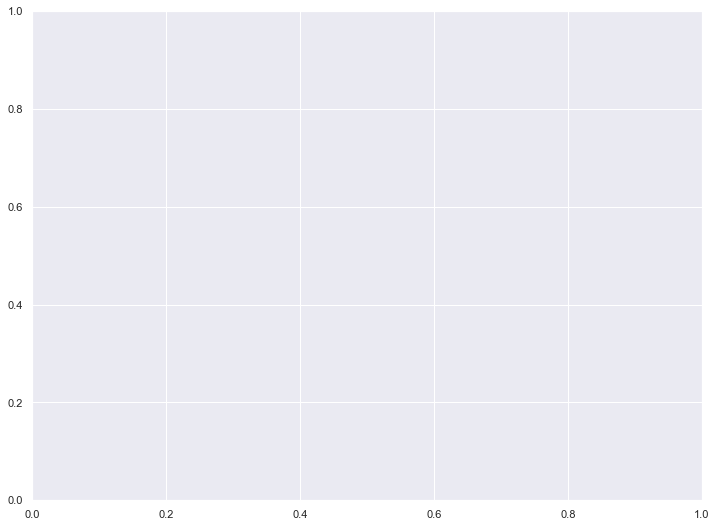

In [79]:
f4 , ax4 = plt.subplots(figsize = (12,9))

fig4 = sns.heatmap(data[cols] , annot = True , xticklabels= cols.values , yticklabels = cols.values )


* Present Visualize Mong Features and Output

In [30]:
v1 = "temp_1"
v2 = "average"
v3 = "forecast_acc"
v4 = "forecast_under"


data1 = pd.concat([data["actual"] , data[v1]] , axis = 1)
data2 = pd.concat([data["actual"] , data[v2]] , axis = 1)
data3 = pd.concat([data["actual"] , data[v3]] , axis = 1)
data4 = pd.concat([data["actual"] , data[v4]] , axis = 1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


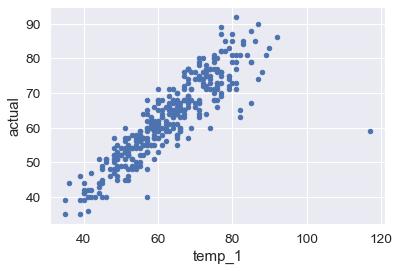

In [36]:
data1.plot.scatter( x = v1, y = "actual" )  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


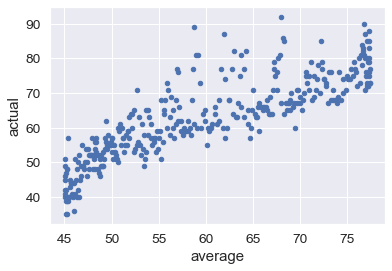

In [37]:
data2.plot.scatter( x = v2 , y = "actual")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


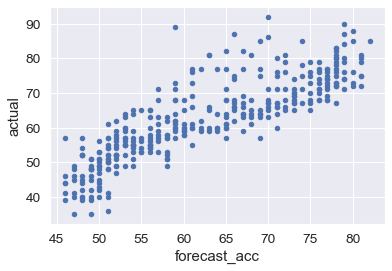

In [38]:
data3.plot.scatter( x = v3 , y = "actual")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


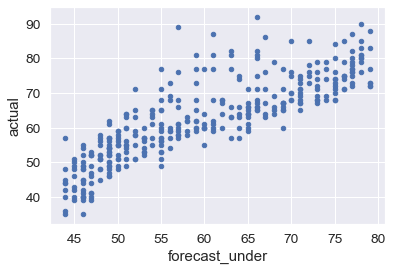

In [39]:
data4.plot.scatter( x = v4 , y = "actual")

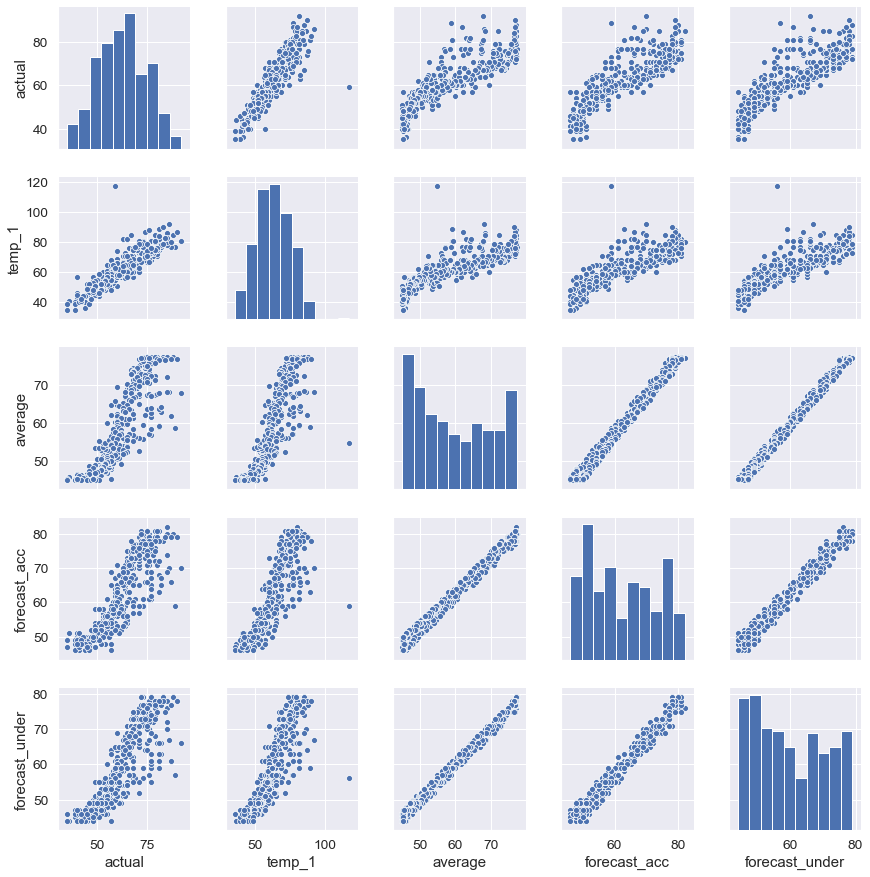

In [42]:
columns = ['actual', 'temp_1', 'average', 'forecast_acc', 'forecast_under']
sns.pairplot(data[columns])

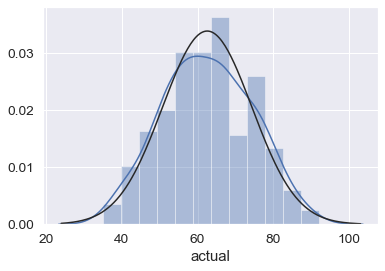

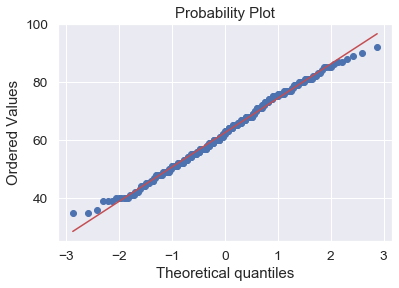

In [45]:
sns.distplot(data["actual"] , fit = norm)
f1 = plt.figure()
res = stats.probplot( data["actual"] ,   plot = plt)


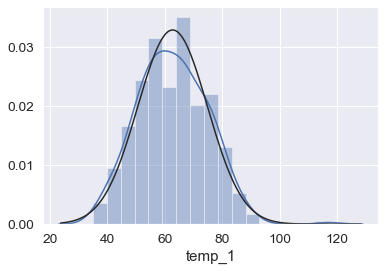

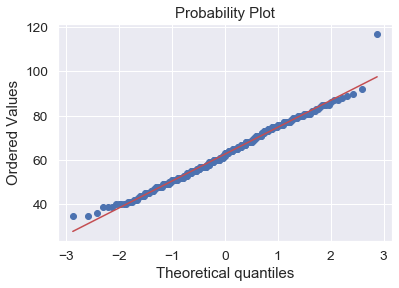

In [46]:
sns.distplot(data["temp_1"] , fit = norm)
f1 = plt.figure()
res = stats.probplot( data["temp_1"] ,   plot = plt)


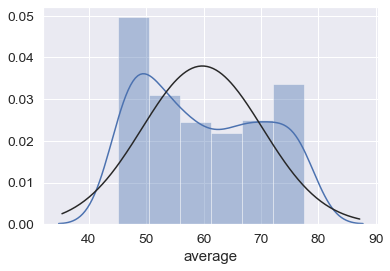

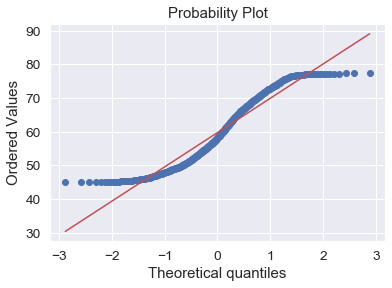

In [47]:
sns.distplot(data["average"] , fit = norm)
f = plt.figure()
res = stats.probplot(data["average"] , plot = plt)

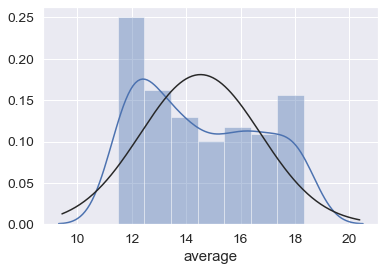

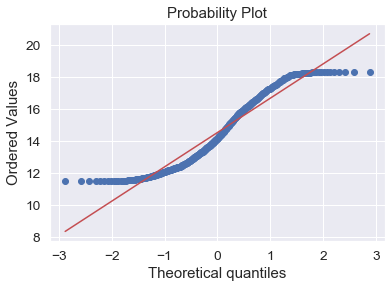

In [55]:
data["average"] = np.log(data["average"] )
sns.distplot(data["average"] , fit = norm)
f = plt.figure()
res = stats.probplot(data["average"] , plot = plt)